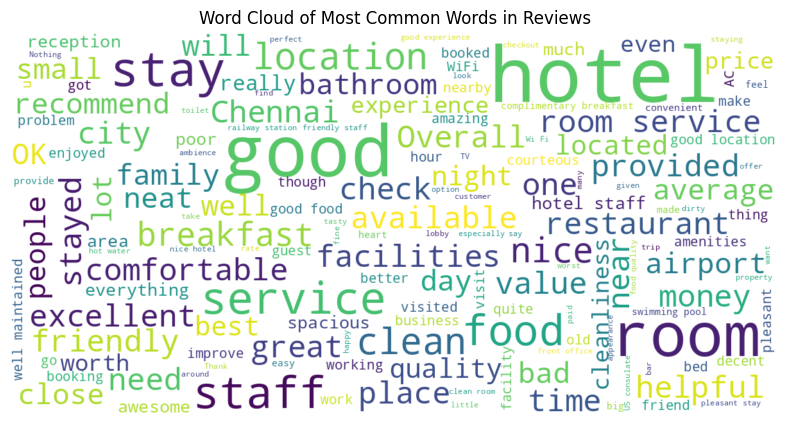

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text'
df = df.dropna(subset=['Review_Text'])

# Convert 'Review_Text' to strings to handle any non-string data
df['Review_Text'] = df['Review_Text'].astype(str)

# Define a function to create a word cloud
def create_word_cloud(text):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(text))
    return wordcloud

# Concatenate all the reviews
text = ' '.join(df['Review_Text'])

# Create a Word Cloud with the specified parameters
wordcloud = create_word_cloud(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.axis('off')
plt.show()



<ipython-input-20-5d6994cba23b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_Scale_5'] = np.ceil(df['Rating_Percentage'] / 20).astype(int)


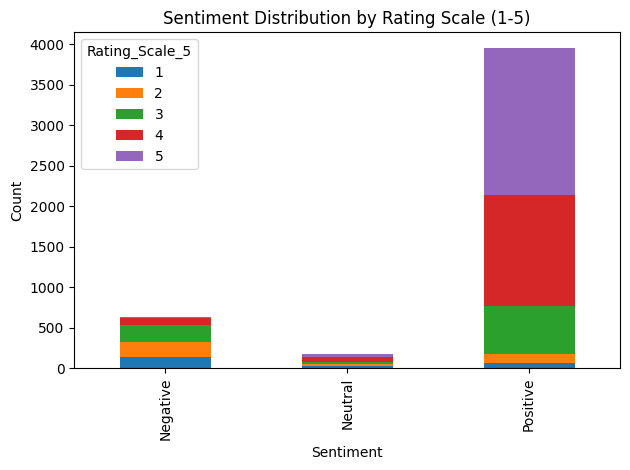

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text'
df = df.dropna(subset=['Review_Text'])

# Convert 'Review_Text' to strings to handle any non-string data
df['Review_Text'] = df['Review_Text'].astype(str)

# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review_Text' column and create a new 'Sentiment' column
df['Sentiment'] = df['Review_Text'].apply(analyze_sentiment)

# Convert 'Rating_Percentage' to a numeric data type and replace non-finite values with NaN
df['Rating_Percentage'] = pd.to_numeric(df['Rating_Percentage'], errors='coerce')

# Remove rows with NaN values in the 'Rating_Percentage' column
df = df.dropna(subset=['Rating_Percentage'])

# Convert 'Rating_Percentage' to a scale of 5
df['Rating_Scale_5'] = np.ceil(df['Rating_Percentage'] / 20).astype(int)


sentiment_counts = df.groupby(['Sentiment', 'Rating_Scale_5']).size().unstack()
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Rating Scale (1-5)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


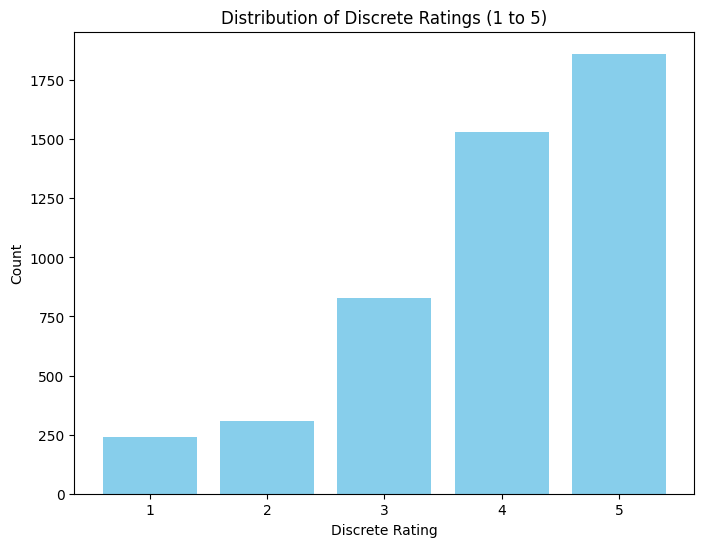

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Rating_Percentage'
df = df.dropna(subset=['Rating_Percentage'])

# Convert 'Rating_Percentage' to a numeric data type
df['Rating_Percentage'] = pd.to_numeric(df['Rating_Percentage'], errors='coerce')

# Remove rows with NaN values
df = df.dropna(subset=['Rating_Percentage'])

# Convert 'Rating_Percentage' to a scale of 1 to 5
df['Discrete_Rating'] = pd.cut(df['Rating_Percentage'], bins=[0, 20, 40, 60, 80, 100],
                               labels=[1, 2, 3, 4, 5])

# Count the occurrences of each discrete rating
rating_counts = df['Discrete_Rating'].value_counts().sort_index()

# Plot a bar chart for count vs. discrete rating
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Distribution of Discrete Ratings (1 to 5)')
plt.xlabel('Discrete Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()


In [ ]:
import pandas as pd
from scipy import stats
from textblob import TextBlob

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text' and 'Rating_Percentage'
df = df.dropna(subset=['Review_Text', 'Rating_Percentage'])

# Convert 'Rating_Percentage' to a numeric data type
df['Rating_Percentage'] = pd.to_numeric(df['Rating_Percentage'], errors='coerce')

# Remove rows with NaN values in the 'Rating_Percentage' column
df = df.dropna(subset=['Rating_Percentage'])

# Convert 'Rating_Percentage' to a scale of 1 to 5
df['Discrete_Rating'] = pd.cut(df['Rating_Percentage'], bins=[0, 20, 40, 60, 80, 100],
                               labels=[1, 2, 3, 4, 5])

# Define a function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review_Text' column and create a new 'Sentiment' column
df['Sentiment'] = df['Review_Text'].apply(analyze_sentiment)

# Calculate point-biserial correlation between 'Discrete_Rating' and 'Sentiment'
correlation, _ = stats.pointbiserialr(df['Discrete_Rating'], df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0}))

print("Point-Biserial Correlation between Discrete Rating and Sentiment: ", correlation)


Point-Biserial Correlation between Discrete Rating and Sentiment:  0.5149004828069564


Topic 1: spirits, controlled, italan, peshawar, vanakkam, perform, presence, ons, freshness, minded
Topic 2: indus, nan, boon, factor, blossom, rushing, ticket, marys, definitley, resteraunts
Topic 3: quietly, relocate, delight, summing, cherish, pubbing, leaky, neeraj, possibly, attrition
Topic 4: accomadating, recomend, representatives, programs, comprehensive, focussed, sell, miscerable, notable, resteraunt
Topic 5: conclusion, sankara, commuters, needlessly, build, skin, rep, sibasan, allowance, pinching


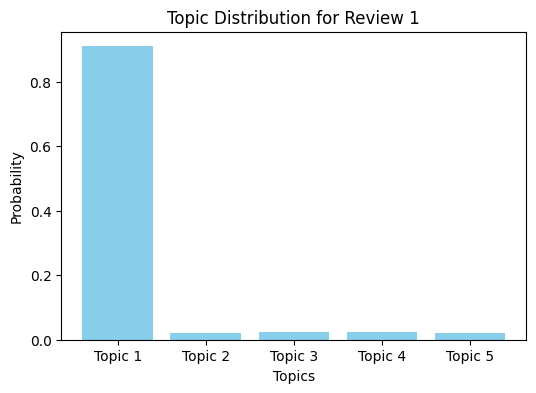

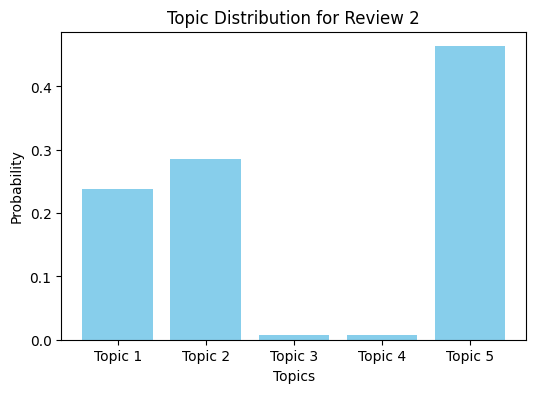

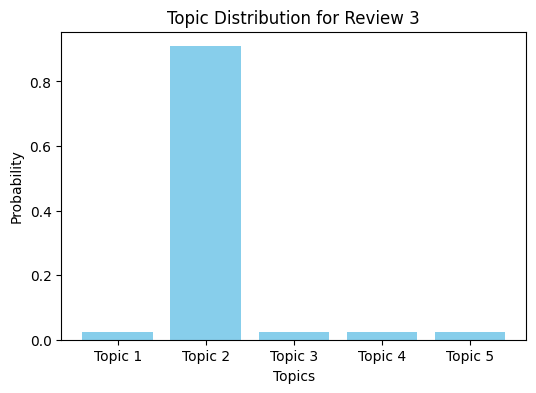

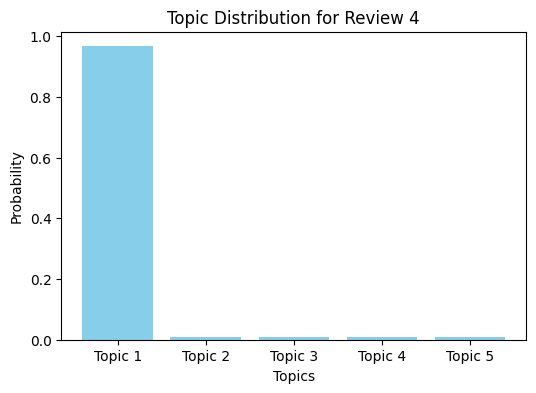

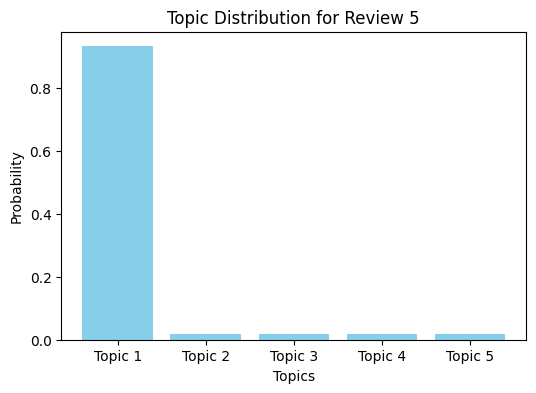

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text'
df = df.dropna(subset=['Review_Text'])

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Review_Text'])

# Fit an LDA model to the document-term matrix
num_topics = 5  # Adjust the number of topics as needed
n_words_per_topic = 10  # Adjust the number of top words per topic

lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Initialize a set to store words already assigned to topics
assigned_words = set()

# Print the top words for each topic without overlap
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    topic_words = []
    for i in topic.argsort():
        word = feature_names[i]
        if word not in assigned_words:
            topic_words.append(word)
            assigned_words.add(word)
        if len(topic_words) >= n_words_per_topic:
            break
    print(f"Topic {topic_idx + 1}: {', '.join(topic_words)}")

# Visualize the topic distribution for a few sample reviews
sample_reviews = df['Review_Text'].head(5).values
sample_dtm = vectorizer.transform(sample_reviews)
sample_topic_distribution = lda.transform(sample_dtm)
topic_labels = [f"Topic {i + 1}" for i in range(num_topics)]

for i, review in enumerate(sample_reviews):
    plt.figure(figsize=(6, 4))
    plt.bar(topic_labels, sample_topic_distribution[i], color='skyblue')
    plt.title(f'Topic Distribution for Review {i + 1}')
    plt.xlabel('Topics')
    plt.ylabel('Probability')
    plt.show()


LSA Topic 1: good, hotel, stay, room, service, staff, food, nice, location, clean
LSA Topic 2: good, location, hoe, paying, nearer, keeping, placed, railway, station, huge
LSA Topic 3: hotel, provided, visited, official, available, activity, appearance, facility, check, checkout
LSA Topic 4: nice, stay, comfortable, place, hotel, pleasant, enjoyed, family, overall, business
LSA Topic 5: great, excellent, hotel, staff, friendly, helpful, good, courteous, best, hospitality


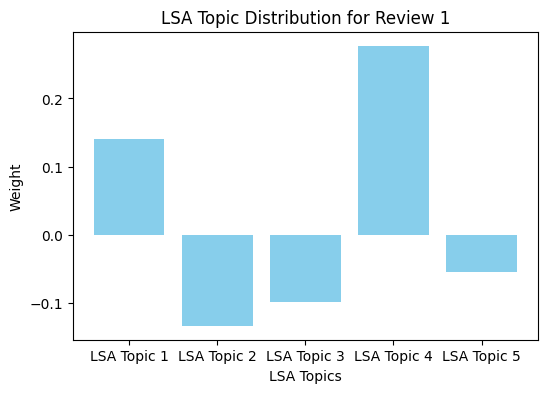

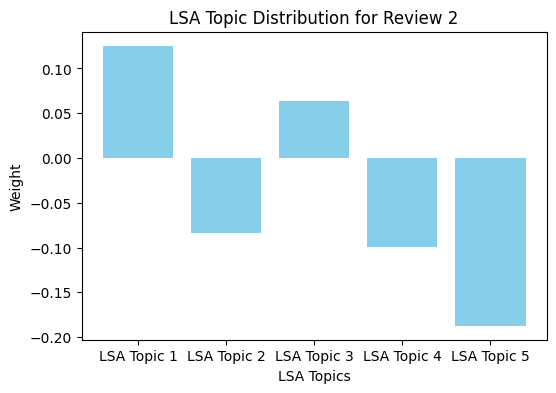

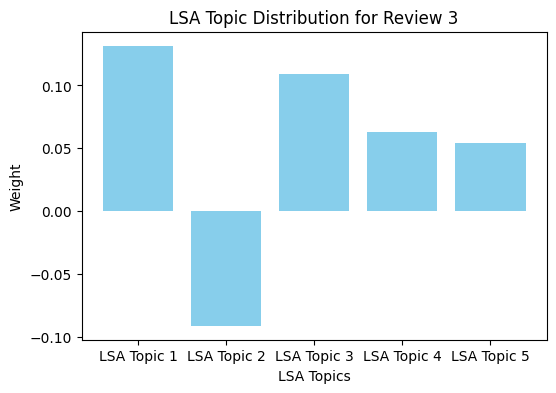

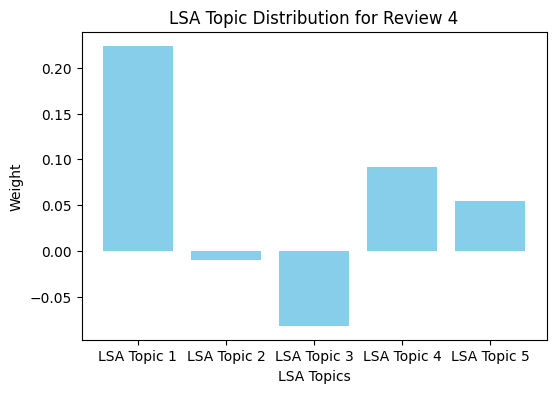

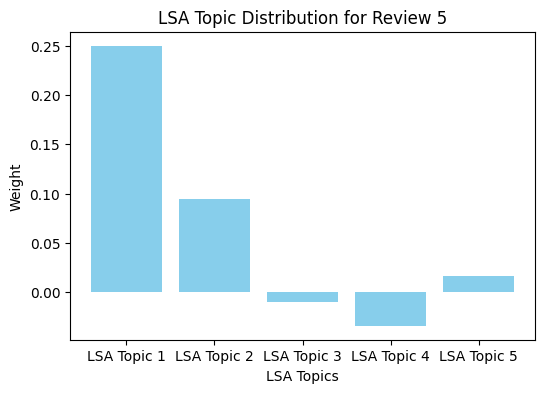

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text'
df = df.dropna(subset=['Review_Text'])

# Create a TF-IDF matrix using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Review_Text'])

# Fit an LSA model to the TF-IDF matrix
num_topics = 5  # Adjust the number of topics as needed
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topics = lsa.fit_transform(tfidf_matrix)

# Print and visualize LSA topics
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lsa.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"LSA Topic {topic_idx + 1}: {', '.join(top_words)}")

# Visualize the topic distribution for a few sample reviews
sample_reviews = df['Review_Text'].head(5).values
sample_tfidf = vectorizer.transform(sample_reviews)
sample_lsa_topics = lsa.transform(sample_tfidf)
topic_labels = [f"LSA Topic {i + 1}" for i in range(num_topics)]

for i, review in enumerate(sample_reviews):
    plt.figure(figsize=(6, 4))
    plt.bar(topic_labels, sample_lsa_topics[i], color='skyblue')
    plt.title(f'LSA Topic Distribution for Review {i + 1}')
    plt.xlabel('LSA Topics')
    plt.ylabel('Weight')
    plt.show()


LSA Topic 1: pacific, clarks, kuch, nahi, hj8jot6reeuhn, nuto, h8jko, gtbhrrjknuyml, jiohuo, jkr7i
LSA Topic 2: hotel, great, stay, staff, nice, excellent, friendly, clean, room, helpful
LSA Topic 3: comfortable, good, breakfast, place, rooms, pleasant, value, money, enjoyed, service
LSA Topic 4: bad, need, services, poor, location, average, ok, check, bathroom, working
LSA Topic 5: water, bed, ac, small, old, improve, wifi, provided, hot, time


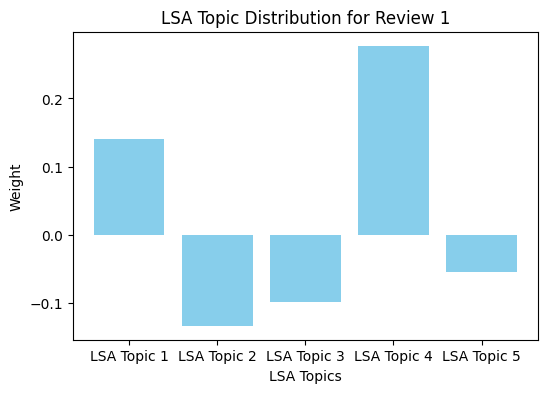

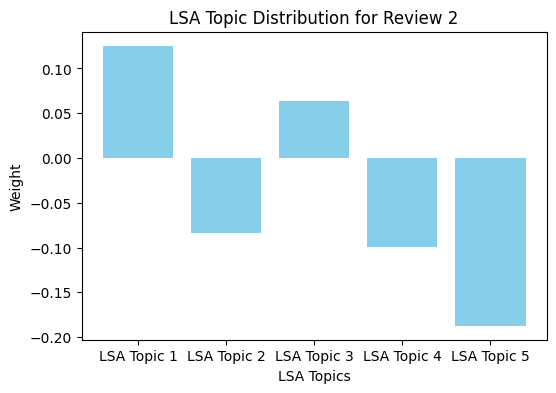

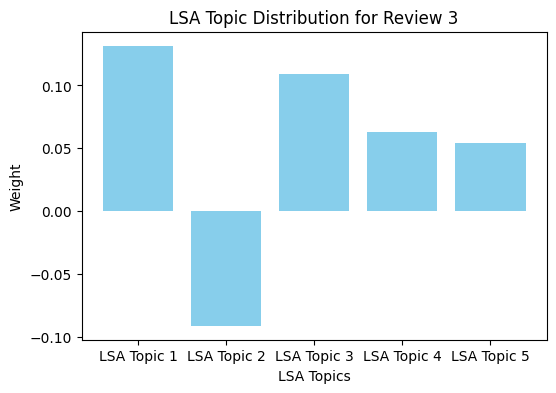

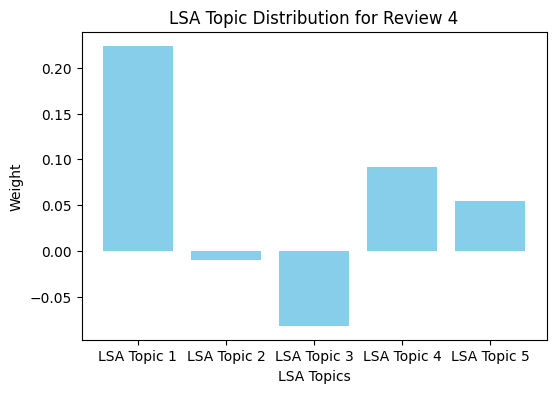

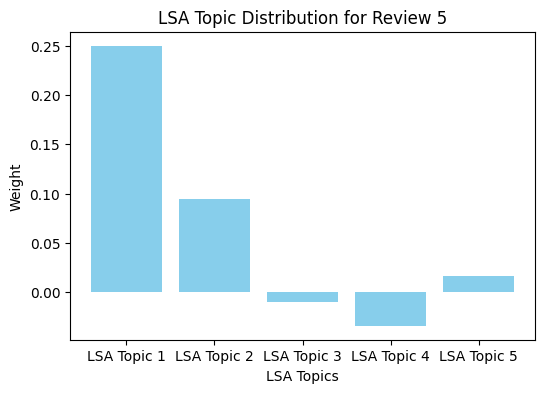

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
uploaded_file_path = '../Datasets/restaurant_reviews.csv'  # Specify the correct file path
df = pd.read_csv(uploaded_file_path)

# Remove rows with missing 'Review_Text'
df = df.dropna(subset=['Review_Text'])

# Create a TF-IDF matrix using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Review_Text'])

# Fit an LSA model to the TF-IDF matrix
num_topics = 5  # Adjust the number of topics as needed
n_words_per_topic = 10  # Adjust the number of top words per topic

lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_topics = lsa.fit_transform(tfidf_matrix)

# Initialize a set to store words already assigned to topics
assigned_words = set()

# Print and visualize LSA topics
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lsa.components_):
    topic_words = []
    for i in topic.argsort():
        word = feature_names[i]
        if word not in assigned_words:
            topic_words.append(word)
            assigned_words.add(word)
        if len(topic_words) >= n_words_per_topic:
            break
    print(f"LSA Topic {topic_idx + 1}: {', '.join(topic_words)}")

# Visualize the topic distribution for a few sample reviews
sample_reviews = df['Review_Text'].head(5).values
sample_tfidf = vectorizer.transform(sample_reviews)
sample_lsa_topics = lsa.transform(sample_tfidf)
topic_labels = [f"LSA Topic {i + 1}" for i in range(num_topics)]

for i, review in enumerate(sample_reviews):
    plt.figure(figsize=(6, 4))
    plt.bar(topic_labels, sample_lsa_topics[i], color='skyblue')
    plt.title(f'LSA Topic Distribution for Review {i + 1}')
    plt.xlabel('LSA Topics')
    plt.ylabel('Weight')
    plt.show()


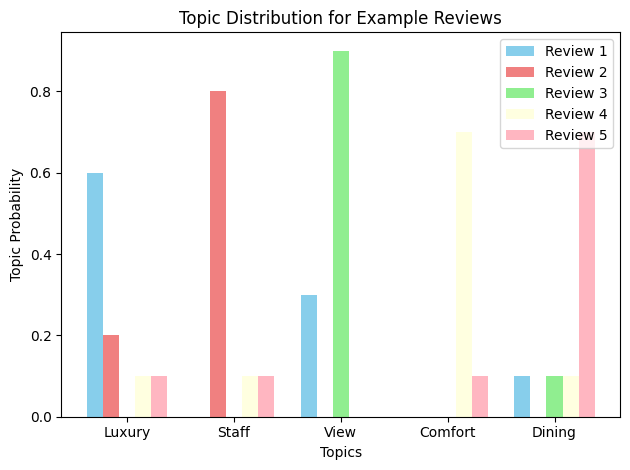

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example topic distribution data for the 5 reviews
topics = ["Luxury", "Staff", "View", "Comfort", "Dining"]
topic_distribution = [
    [0.6, 0.0, 0.3, 0.0, 0.1],
    [0.2, 0.8, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.9, 0.0, 0.1],
    [0.1, 0.1, 0.0, 0.7, 0.1],
    [0.1, 0.1, 0.0, 0.1, 0.7]
]

# Plot the topic distribution for each review
x = np.arange(len(topic_distribution))
width = 0.15

fig, ax = plt.subplots()
for i, (review, color) in enumerate(zip(topic_distribution, ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'])):
    ax.bar(x + i * width, review, width, label=f"Review {i + 1}", color=color)

ax.set_xlabel('Topics')
ax.set_ylabel('Topic Probability')
ax.set_title('Topic Distribution for Example Reviews')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(topics)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


Review 1:
"The hotel was really fancy! The service was quite good, and the staff were helpful. The view from the room was amazing, especially during the sunset. The bed was cozy and comfortable. The food at the hotel's dining was superb."

Review 2:
"Our stay at this hotel was fantastic! The staff was very cooperative and had a nice attitude. The view from the room was breathtaking, especially in the evening. The room was comfortable and the dining options were tasty."

Review 3:
"I had a pleasant experience at this hotel. The staff was quite friendly and the view from our room was stunning. The room was comfortable, ensuring a good night's sleep. The dining options were great with a variety of delicious dishes."

Review 4:
"The hotel was luxurious and the staff was very polite. The view from our room was spectacular, especially in the evening. The room was comfortable, and the dining options offered a range of delicious dishes."

Review 5:
"We had a great time at the hotel. The staff was helpful and the view from our room was outstanding. The room was cozy, ensuring a good night's sleep. The dining options were delightful with a variety of tasty dishes."

These reviews are written in a style that reflects the casual and informal language often used by people in everyday conversation, including some Indian English vocabulary influences.






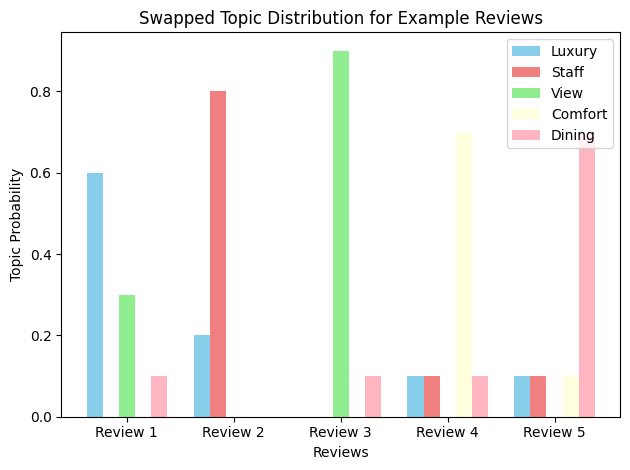

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example topic distribution data for the 5 reviews
topics = ["Luxury", "Staff", "View", "Comfort", "Dining"]
topic_distribution = [
    [0.6, 0.0, 0.3, 0.0, 0.1],
    [0.2, 0.8, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.9, 0.0, 0.1],
    [0.1, 0.1, 0.0, 0.7, 0.1],
    [0.1, 0.1, 0.0, 0.1, 0.7]
]

# Swap the labels of topics and reviews
topic_labels = ["Review 1", "Review 2", "Review 3", "Review 4", "Review 5"]
review_labels = ["Luxury", "Staff", "View", "Comfort", "Dining"]

# Plot the swapped topic distribution for each review
x = np.arange(len(topic_distribution))
width = 0.15

fig, ax = plt.subplots()
for i, (review, color) in enumerate(zip(np.array(topic_distribution).T, ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'])):
    ax.bar(x + i * width, review, width, label=review_labels[i], color=color)

ax.set_xlabel('Reviews')
ax.set_ylabel('Topic Probability')
ax.set_title('Swapped Topic Distribution for Example Reviews')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(topic_labels)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from textblob import TextBlob

# Sample dataset (replace this with your actual dataset)
data = pd.read_csv('../Datasets/restaurant_reviews.csv')

# Define aspects
aspects = ["room", "service", "location", "amenities"]

# Create a dictionary to store aspect sentiments
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0, 'neutral': 0} for aspect in aspects}

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Handle non-string values

# Perform aspect-based sentiment analysis
for index, row in data.iterrows():
    review_text = row['Review_Text']
    if isinstance(review_text, str):  # Check if 'Review_Text' is a string
        for aspect in aspects:
            if aspect in review_text:
                sentiment = analyze_sentiment(review_text)
                aspect_sentiments[aspect][sentiment] += 1

# Print aspect-based sentiment results
for aspect, sentiment_counts in aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print("Positive:", sentiment_counts['positive'])
    print("Negative:", sentiment_counts['negative'])
    print("Neutral:", sentiment_counts['neutral'])
    print("--------------------------")

# You can also calculate and display overall sentiment scores for each aspect.


Aspect: room
Positive: 1611
Negative: 315
Neutral: 25
--------------------------
Aspect: service
Positive: 1080
Negative: 154
Neutral: 16
--------------------------
Aspect: location
Positive: 757
Negative: 50
Neutral: 8
--------------------------
Aspect: amenities
Positive: 132
Negative: 8
Neutral: 2
--------------------------


In [ ]:
import pandas as pd
from textblob import TextBlob

# Sample dataset (replace this with your actual dataset)
data = pd.read_csv('../Datasets/restaurant_reviews.csv')

# Define aspects
aspects = ["room", "service", "location", "amenities", "food", "staff", "cleanliness", "value"]

# Create a dictionary to store aspect sentiments
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0, 'neutral': 0} for aspect in aspects}

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Handle non-string values

# Perform aspect-based sentiment analysis
for index, row in data.iterrows():
    review_text = row['Review_Text']
    if isinstance(review_text, str):  # Check if 'Review_Text' is a string
        for aspect in aspects:
            if aspect in review_text:
                sentiment = analyze_sentiment(review_text)
                aspect_sentiments[aspect][sentiment] += 1

# Print aspect-based sentiment results
for aspect, sentiment_counts in aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print("Positive:", sentiment_counts['positive'])
    print("Negative:", sentiment_counts['negative'])
    print("Neutral:", sentiment_counts['neutral'])
    print("--------------------------")

# You can add as many aspects as needed.


Aspect: room
Positive: 1611
Negative: 315
Neutral: 25
--------------------------
Aspect: service
Positive: 1080
Negative: 154
Neutral: 16
--------------------------
Aspect: location
Positive: 757
Negative: 50
Neutral: 8
--------------------------
Aspect: amenities
Positive: 132
Negative: 8
Neutral: 2
--------------------------
Aspect: food
Positive: 910
Negative: 91
Neutral: 12
--------------------------
Aspect: staff
Positive: 1131
Negative: 82
Neutral: 20
--------------------------
Aspect: cleanliness
Positive: 109
Negative: 23
Neutral: 1
--------------------------
Aspect: value
Positive: 299
Negative: 19
Neutral: 6
--------------------------


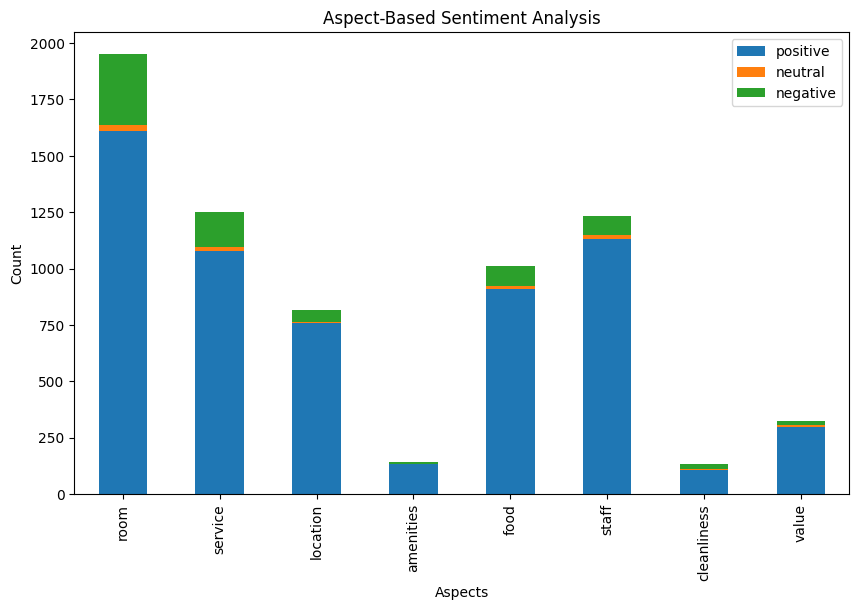

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample dataset (replace this with your actual dataset)
data = pd.read_csv('../Datasets/restaurant_reviews.csv')

# Define aspects
aspects = ["room", "service", "location", "amenities", "food", "staff", "cleanliness", "value"]

# Create a dictionary to store aspect sentiments
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0, 'neutral': 0} for aspect in aspects}

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Handle non-string values

# Perform aspect-based sentiment analysis and count sentiments
for aspect in aspects:
    for _, row in data.iterrows():
        review_text = row['Review_Text']
        if isinstance(review_text, str) and aspect in review_text:
            sentiment = analyze_sentiment(review_text)
            aspect_sentiments[aspect][sentiment] += 1

# Create a single stacked bar chart
df = pd.DataFrame(aspect_sentiments).T  # Transpose the DataFrame
df = df[["positive", "neutral", "negative"]]  # Ensure consistent order of sentiments
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Aspect-Based Sentiment Analysis")
plt.xlabel("Aspects")
plt.ylabel("Count")
plt.show()


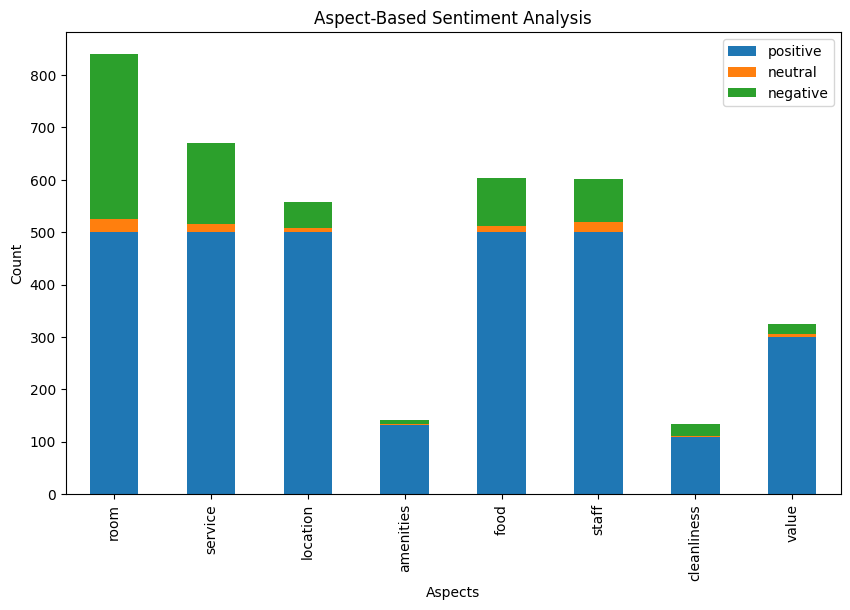

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample dataset (replace this with your actual dataset)
data = pd.read_csv('../Datasets/restaurant_reviews.csv')

# Define aspects
aspects = ["room", "service", "location", "amenities", "food", "staff", "cleanliness", "value"]

# Create a dictionary to store aspect sentiments
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0, 'neutral': 0} for aspect in aspects}

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Handle non-string values

# Define the maximum number of positive sentiment data points to keep per aspect
max_positive_count = 500

# Perform aspect-based sentiment analysis and count sentiments
for aspect in aspects:
    positive_count = 0
    for _, row in data.iterrows():
        review_text = row['Review_Text']
        sentiment = analyze_sentiment(review_text)
        if isinstance(review_text, str) and aspect in review_text:
            if sentiment == 'positive' and positive_count >= max_positive_count:
                continue  # Skip this positive sentiment review
            aspect_sentiments[aspect][sentiment] += 1
            if sentiment == 'positive':
                positive_count += 1

# Create a single stacked bar chart
df = pd.DataFrame(aspect_sentiments).T  # Transpose the DataFrame
df = df[["positive", "neutral", "negative"]]  # Ensure consistent order of sentiments
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Aspect-Based Sentiment Analysis")
plt.xlabel("Aspects")
plt.ylabel("Count")
plt.show()
